In [1]:
import pandas as pd


cleaned_data = pd.read_csv('cleaned_CKD_dataset.csv')

Starting Random Forest analysis with 1000 trees...
Preparing data...
Training Random Forest with 1000 trees...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


Evaluating model performance...
Performing cross-validation...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elaps

Calculating performance metrics...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps


=== Model Performance ===
Training Accuracy: 1.0000
Testing Accuracy: 0.9875

Cross-validation Scores:
Mean: 0.9990
Std: 0.0016

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


=== Overfitting Analysis ===
Train-Test Score Difference: 0.0125
Good generalization: Model is not overfitting

=== Top 5 Most Important Features ===
   feature  importance
9     Hemo    0.280116
6       Sc    0.170497
11    Rbcc    0.138950
1       Sg    0.134396
2       Al    0.127118

Generating visualizations...


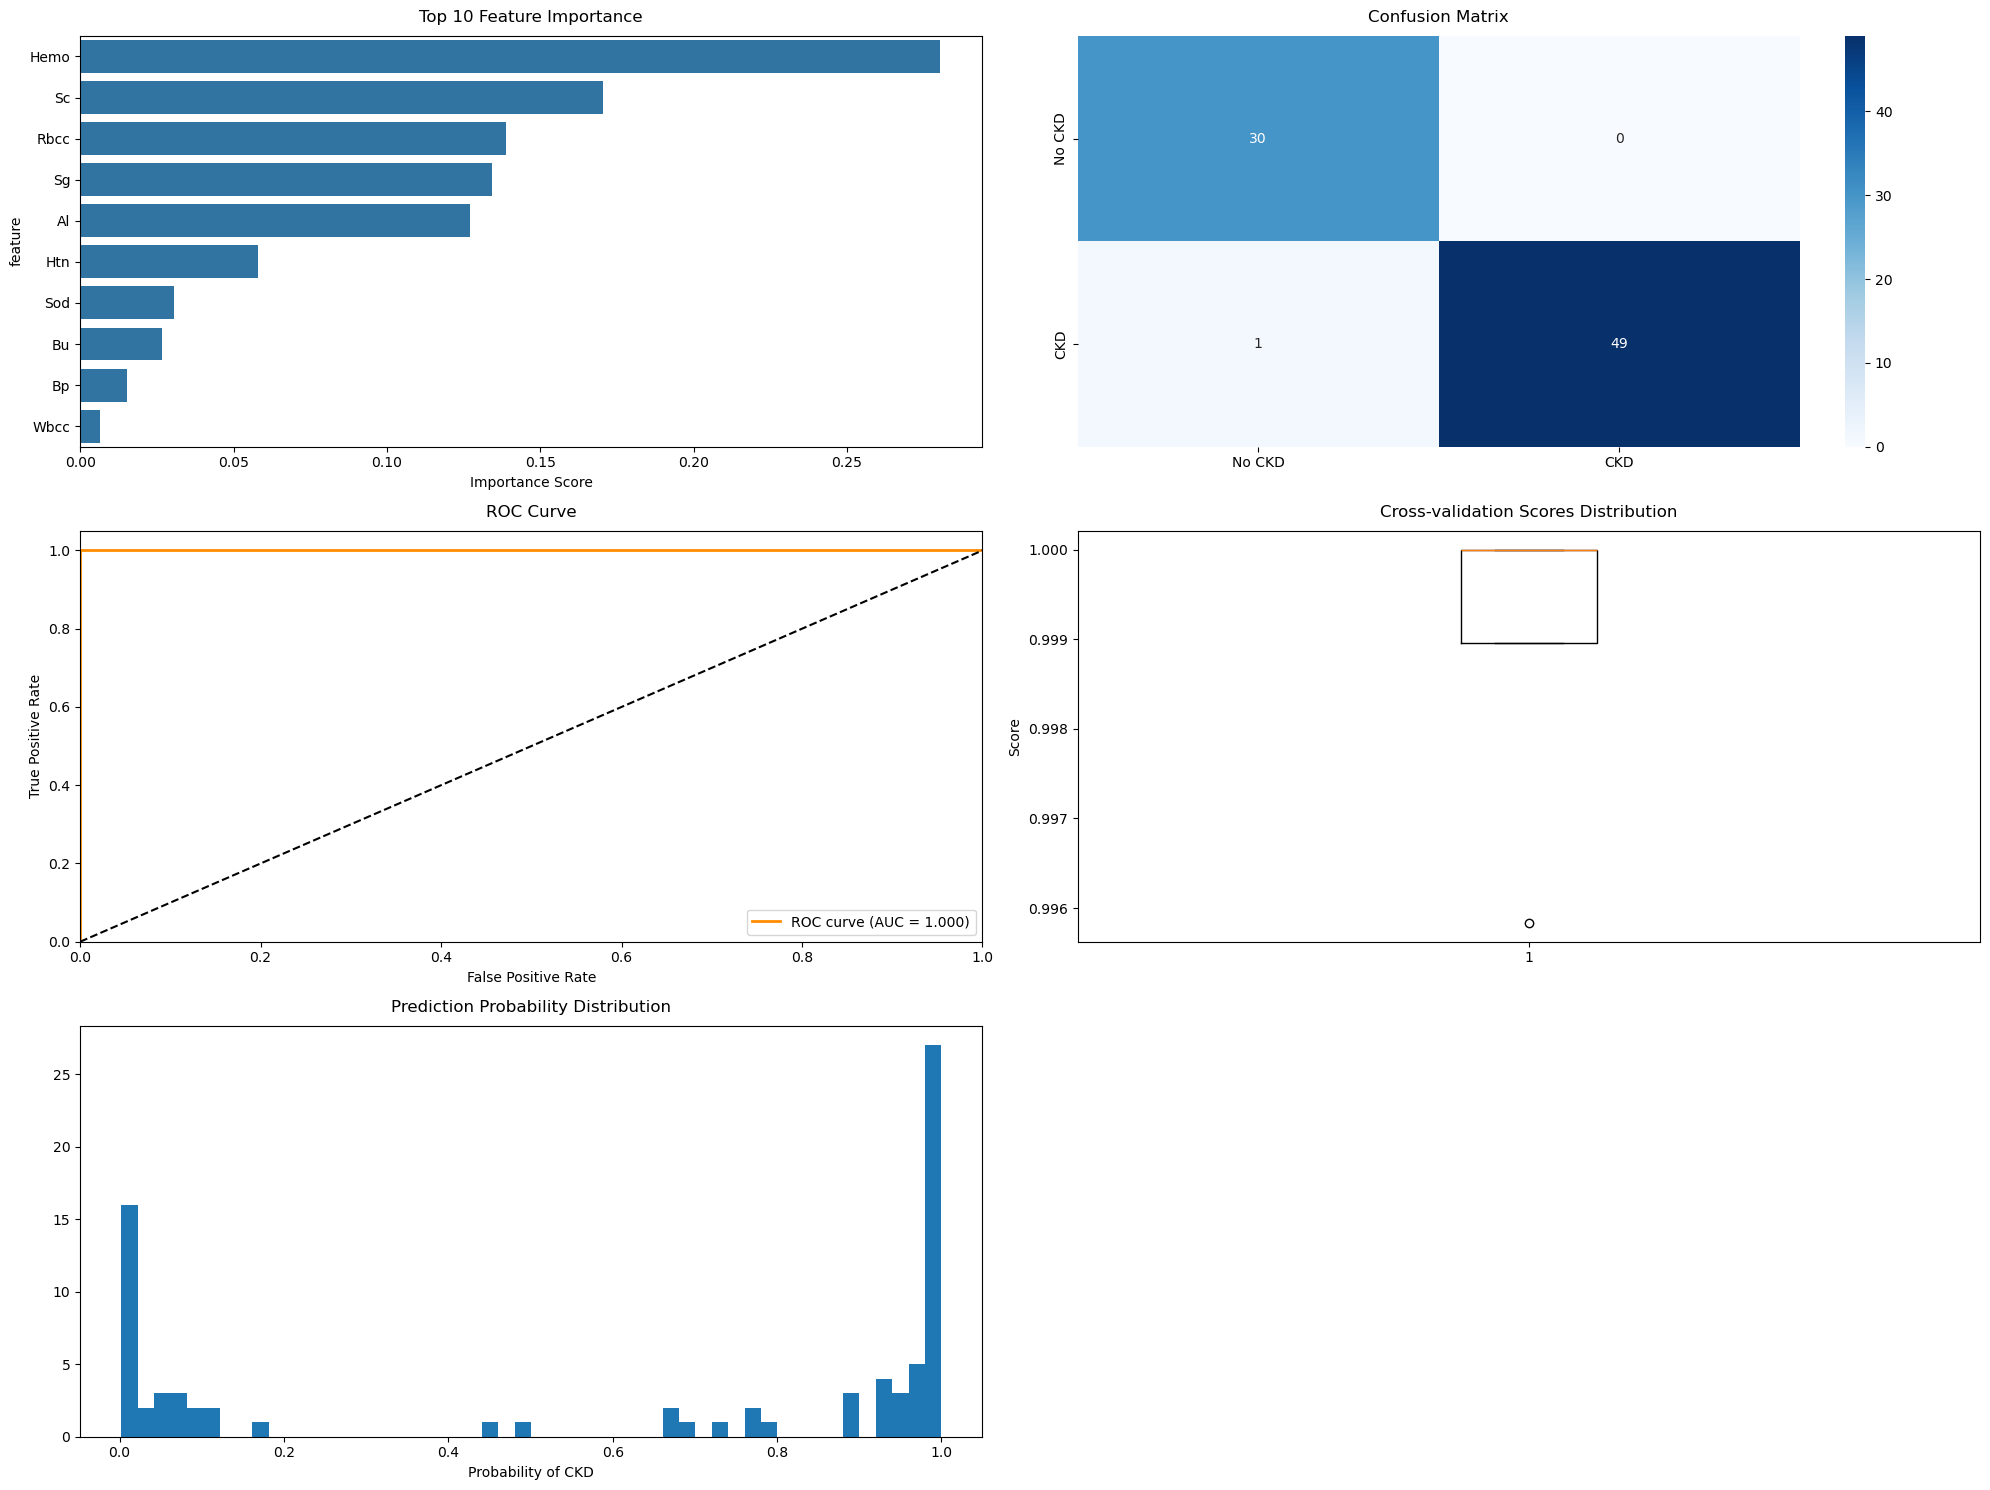

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
kd_data = pd.read_csv('cleaned_CKD_dataset.csv')

# Data Preparation
def prepare_data(df):
    # Standardize numeric features
    numeric_features = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    # Prepare features and target
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    return X, y

# Create Random Forest with 1000 trees
def create_rf_1000():
    return RandomForestClassifier(
        n_estimators=1000,         # Using 1000 trees
        max_depth=8,               
        min_samples_split=10,      
        min_samples_leaf=4,        
        max_features='sqrt',       
        class_weight='balanced',   
        random_state=42,
        n_jobs=-1,                
        verbose=1                  
    )

# Enhanced visualization without style setting
def plot_comprehensive_results(model, results, X_train):
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Feature Importance
    plt.subplot(3, 2, 1)
    imp_df = results['feature_importance'].head(10)
    sns.barplot(x='importance', y='feature', data=imp_df)
    plt.title('Top 10 Feature Importance', fontsize=12, pad=10)
    plt.xlabel('Importance Score')
    
    # 2. Confusion Matrix
    plt.subplot(3, 2, 2)
    cm = confusion_matrix(y_test, results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No CKD', 'CKD'],
                yticklabels=['No CKD', 'CKD'])
    plt.title('Confusion Matrix', fontsize=12, pad=10)
    
    # 3. ROC Curve
    plt.subplot(3, 2, 3)
    fpr, tpr, roc_auc = results['roc_data']
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve', fontsize=12, pad=10)
    plt.legend(loc="lower right")
    
    # 4. Cross-validation Scores Distribution
    plt.subplot(3, 2, 4)
    plt.boxplot(results['cv_scores'])
    plt.title('Cross-validation Scores Distribution', fontsize=12, pad=10)
    plt.ylabel('Score')
    
    # 5. Prediction Probability Distribution
    plt.subplot(3, 2, 5)
    plt.hist(results['y_pred_proba'], bins=50)
    plt.title('Prediction Probability Distribution', fontsize=12, pad=10)
    plt.xlabel('Probability of CKD')
    
    plt.tight_layout()
    plt.show()

# Model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    print("Performing cross-validation...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    print("Calculating performance metrics...")
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    feature_imp = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return {
        'cv_scores': cv_scores,
        'train_score': train_score,
        'test_score': test_score,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'roc_data': (fpr, tpr, roc_auc),
        'feature_importance': feature_imp
    }

# Main execution
print("Starting Random Forest analysis with 1000 trees...")

# Prepare data
print("Preparing data...")
X, y = prepare_data(kd_data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and train model
print("Training Random Forest with 1000 trees...")
rf_model = create_rf_1000()
rf_model.fit(X_train, y_train)

# Evaluate model
print("Evaluating model performance...")
results = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Print comprehensive results
print("\n=== Model Performance ===")
print(f"Training Accuracy: {results['train_score']:.4f}")
print(f"Testing Accuracy: {results['test_score']:.4f}")
print(f"\nCross-validation Scores:")
print(f"Mean: {results['cv_scores'].mean():.4f}")
print(f"Std: {results['cv_scores'].std():.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, results['y_pred']))

# Check for overfitting
overfitting_diff = results['train_score'] - results['test_score']
print("\n=== Overfitting Analysis ===")
print(f"Train-Test Score Difference: {overfitting_diff:.4f}")
if overfitting_diff > 0.05:
    print("Warning: Potential overfitting detected")
else:
    print("Good generalization: Model is not overfitting")

# Print top features
print("\n=== Top 5 Most Important Features ===")
print(results['feature_importance'].head().to_string())

# Plot results
print("\nGenerating visualizations...")
plot_comprehensive_results(rf_model, results, X_train)